# Sonar Rock or Mine Prediction using Logistic Regression

![Sonar Rock vs Mine Detection](Banner.jpg)



Yeah, I made this Image

## Introduction
This project focuses on the prediction of underwater objects as either rocks or mines using sonar data. Sonar, short for Sound Navigation and Ranging, is a technique that uses sound waves to detect and locate objects underwater. By analyzing the echoes produced by these sound waves, we can gather information about the objects present in the water.




The objective of this project is to develop a predictive model that can classify the detected objects as either rocks or mines based on the sonar data. To achieve this, we will employ logistic regression, a popular machine learning algorithm for binary classification tasks.

## Dataset
The dataset used for this project contains a collection of sonar signals, each corresponding to a specific object detected underwater. The signals were obtained by bouncing sound waves off the objects and recording the returning echoes. For each signal, a set of numerical features were extracted, representing various characteristics of the echoes.

The dataset is labeled, with each object categorized as either a rock or a mine. This labeled data will serve as the basis for training our logistic regression model.

## Logistic Regression
Logistic regression is a statistical model that is widely used for binary classification problems. It is particularly suited for scenarios where the dependent variable (the outcome we want to predict) is categorical. In our case, the dependent variable will be the classification of the sonar signals as rocks or mines.

By utilizing logistic regression, we can model the relationship between the input features (sonar data) and the output classes (rock or mine). The model will estimate the probability of an object being a rock or a mine based on the given features.

## Project Workflow
Our project will follow the following workflow:

1. Exploratory Data Analysis: We will start by gaining insights into the dataset, examining the features, and performing descriptive analysis to better understand the data.

2. Data Preprocessing: This step involves preparing the data for the logistic regression model. We may need to handle missing values, normalize the features, and split the dataset into training and testing sets.

3. Model Training: We will train the logistic regression model using the labeled training data. The model will learn to predict the probability of an object being a rock or a mine based on the provided features.

4. Model Evaluation: We will assess the performance of our trained model using evaluation metrics such as accuracy, precision, recall, and F1 score. This step will help us understand how well the model generalizes to unseen data.

5. Prediction System: Finally, we will use the trained model to make predictions on new, unseen sonar signals. These predictions will determine whether the detected objects are rocks or mines.

By following this workflow, we aim to build an accurate and reliable logistic regression model for sonar rock or mine prediction.

Let's dive in!


## 1. Exploratory Data Analysis

### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading the Dataset

In [2]:
data = pd.read_csv('sonar_csv.csv')

In [3]:
data.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


Here, the features are the sonar signals and Hence they do not possess any specific meaning

In [4]:
data.shape

(208, 61)

The info method provides a general insight about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   attribute_1   208 non-null    float64
 1   attribute_2   208 non-null    float64
 2   attribute_3   208 non-null    float64
 3   attribute_4   208 non-null    float64
 4   attribute_5   208 non-null    float64
 5   attribute_6   208 non-null    float64
 6   attribute_7   208 non-null    float64
 7   attribute_8   208 non-null    float64
 8   attribute_9   208 non-null    float64
 9   attribute_10  208 non-null    float64
 10  attribute_11  208 non-null    float64
 11  attribute_12  208 non-null    float64
 12  attribute_13  208 non-null    float64
 13  attribute_14  208 non-null    float64
 14  attribute_15  208 non-null    float64
 15  attribute_16  208 non-null    float64
 16  attribute_17  208 non-null    float64
 17  attribute_18  208 non-null    float64
 18  attribute_19  208 non-null    

The describe method provides useful statistical analytics of the overall dataset

In [6]:
data.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### Visualization

Count plot is used to plot the counts of different available categories

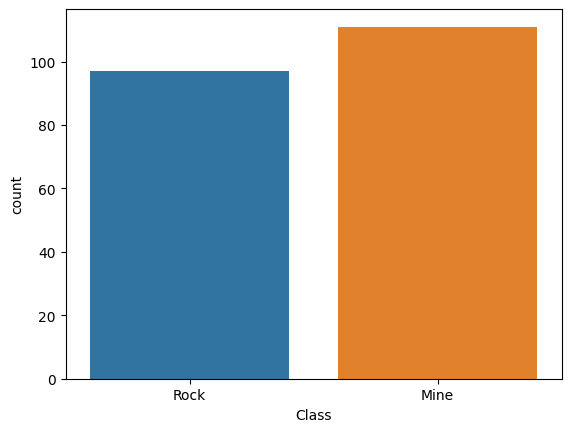

In [7]:
sns.countplot(x = 'Class', data = data)
plt.show()

The count of class labels is given as follows

In [8]:
data['Class'].value_counts()

Class
Mine    111
Rock     97
Name: count, dtype: int64

## 2. Data Preprocessing

The count of missing values is done below. It is obvious that there are any missing values in the given dataset. 

So no need for imputation of missing values

In [9]:
data.isnull().sum()

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
               ..
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
Class           0
Length: 61, dtype: int64

### Data Encoding

Here, the 'Class' column is encoded for training the model. The class label 'Rock' is encoded to 0 and 'Mine' is encoded to 1

In [10]:
data.replace({'Class' : {'Rock' : 0, 'Mine' : 1}}, inplace = True)

###  Data Separation

The data is separated into variable X and Y respectively. The X represents as the features vector and Y represents as the label vector

In [11]:
X = data.drop('Class', axis = 1)
Y = data['Class']

In [12]:
X.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


Since the values of the features are in the range of 0 to 1, there is no need for data normalization

### Splitting the dataset

The dataset is splitted into training and testing data respectively. 

#### Note: 
The training data consists of 90% of the entire dataset, whereas the testing data consists of remaining 10% of the dataset 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

## 3. Model Training

### Logistic Regression

Logistic regression is a popular statistical model used for binary classification tasks. It is widely used in machine learning to predict the probability of an event occurring based on given input features. In logistic regression, the dependent variable is categorical and represents the classes or labels to be predicted.

### Formula

The logistic regression model uses the logistic function, also known as the sigmoid function, to estimate the probability of the binary outcome. The sigmoid function maps any real-valued number to a value between 0 and 1. The formula for logistic regression can be expressed as:

![Logistic Regression Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20P%28Y%3D1%7CX%29%20%3D%20%5Cfrac%7B1%7D%7B1%20&plus;%20e%5E%7B-%28%5Cbeta_0%20&plus;%20%5Cbeta_1X_1%20&plus;%20%5Cbeta_2X_2%20&plus;%20...%20&plus;%20%5Cbeta_nX_n%29%7D%7D)

- **P(Y=1|X)** represents the probability of the binary outcome (Y) being 1 given the input features (X).
- **β0, β1, β2, ..., βn** are the coefficients (parameters) estimated by the logistic regression model.
- **X1, X2, ..., Xn** are the input features.

The logistic regression model uses an optimization algorithm (such as maximum likelihood estimation) to estimate the coefficients that best fit the training data.

### Training the Logistic Regression Model

To train a logistic regression model, we typically use a dataset with labeled examples, where each example consists of input features and the corresponding binary outcome. The model learns the optimal values of the coefficients that maximize the likelihood of the observed data.

During the training process, the model iteratively updates the coefficients using an optimization algorithm. This process continues until convergence, where the coefficients stabilize and the model achieves the best fit to the training data.

### Decision Boundary and Predictions

Once the logistic regression model is trained, it can be used to make predictions on new, unseen examples. The model calculates the probability of the binary outcome being 1 based on the input features. By applying a decision boundary (typically 0.5), the model assigns the example to either class 1 or class 0.


In [14]:
class regression:
    def __init__(self):
        self.weights = None
        self.bias = None
    def fit(self, X, Y, alpha, iterations):
        samples, features = X.shape
        self.weights = np.zeros(features)
        self.bias = 0
        for i in range(iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = 1 / (1 + np.exp(-1 * z))
            dw = (1 / samples) * np.dot(X.T, (y_pred - Y))
            db = (1 / samples) * np.sum(y_pred - Y)
            self.weights -= alpha * dw
            self.bias -= alpha * db
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return (1 / (1 + np.exp(-1 * z)))

In [15]:
model = regression()
model.fit(x_train, y_train, 0.01, 10000)

In [16]:
res = model.predict(x_train) #Prediction values for training set

In [17]:
# Approximating the values according to the decision boundary
pred = []
for i in res:
    if i >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

## 4. Model Evaluation

To evaluate the performance of a logistic regression model, various evaluation metrics can be used, such as accuracy, precision, recall, and F1 score. These metrics assess how well the model predicts the binary outcome compared to the true labels. However, I've evaluated the model only with the metric accuracy.

### Accuracy

In machine learning, accuracy is a commonly used metric to evaluate the performance of a classification model. Accuracy measures the proportion of correctly predicted instances out of the total number of instances.

### Formula

The formula for accuracy is:

![Accuracy Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Ctext%7BAccuracy%7D%20%3D%20%5Cfrac%7B%5Ctext%7BCorrect%20Predictions%7D%7D%7B%5Ctext%7BTotal%20Predictions%7D%7D)

where:
- **Correct Predictions**: the number of instances that are correctly classified by the model.
- **Total Predictions**: the total number of instances in the dataset.

In [18]:
np.sum(pred == y_train) / len(y_train) #Accuracy for the training data

0.8021390374331551

In [19]:
# Now the testing set is predicted as follows
res_test = model.predict(x_test)
res_test

array([0.92772799, 0.05212851, 0.59786425, 0.48247816, 0.74148117,
       0.7743676 , 0.288057  , 0.30858644, 0.87634246, 0.6027003 ,
       0.35793606, 0.61047649, 0.40542389, 0.50334014, 0.84413621,
       0.81247203, 0.4278414 , 0.83056756, 0.53925464, 0.17766009,
       0.20541268])

In [20]:
res_test = np.where(res_test >= 0.5, 1, 0)

In [21]:
np.sum(res_test == y_test) / len(y_test) #Accuracy for the testing data

0.7619047619047619

### Precision

Precision measures the proportion of correctly predicted positive instances out of the total instances predicted as positive. It helps assess the model's accuracy in classifying positive instances.

The formula for precision is:

![Precision Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Ctext%7BPrecision%7D%20%3D%20%5Cfrac%7B%5Ctext%7BTrue%20Positives%7D%7D%7B%5Ctext%7BTrue%20Positives%7D%20&plus;%20%5Ctext%7BFalse%20Positives%7D%7D)

### Recall

Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. It helps evaluate the model's ability to capture positive instances.

The formula for recall is:

![Recall Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Ctext%7BRecall%7D%20%3D%20%5Cfrac%7B%5Ctext%7BTrue%20Positives%7D%7D%7B%5Ctext%7BTrue%20Positives%7D%20&plus;%20%5Ctext%7BFalse%20Negatives%7D%7D)

### F1 Score

The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall.

The formula for the F1 score is:

![F1 Score Formula](https://latex.codecogs.com/png.latex?%5Cdpi%7B150%7D%20%5Ctext%7BF1%20Score%7D%20%3D%20%5Cfrac%7B2%20%5Ctimes%20%5Ctext%7BPrecision%7D%20%5Ctimes%20%5Ctext%7BRecall%7D%7D%7B%5Ctext%7BPrecision%7D%20&plus;%20%5Ctext%7BRecall%7D%7D)

### Code for Calculating Precision, Recall, and F1 Score

In [26]:
def calculate_precision(true_positives, false_positives):
    return true_positives / (true_positives + false_positives)

def calculate_recall(true_positives, false_negatives):
    return true_positives / (true_positives + false_negatives)

def calculate_f1_score(precision, recall):
    return (2 * precision * recall) / (precision + recall)


# Calculate true positives, false positives, and false negatives
true_positives = sum([1 for true, pred in zip(y_train, pred) if true == 1 and pred == 1])
false_positives = sum([1 for true, pred in zip(y_train, pred) if true == 0 and pred == 1])
false_negatives = sum([1 for true, pred in zip(y_train, pred) if true == 1 and pred == 0])

# Calculate precision
precision = calculate_precision(true_positives, false_positives)

# Calculate recall
recall = calculate_recall(true_positives, false_negatives)

# Calculate F1 score
f1_score = calculate_f1_score(precision, recall)

print(f"Precision: {precision:.2f}")
print(f"Recall:  {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Precision: 0.78
Recall:  0.88
F1 Score: 0.83


In [27]:
# Calculate true positives, false positives, and false negatives for test data

true_positives_test = sum([1 for true, pred in zip(y_test, res_test) if true == 1 and pred == 1])
false_positives_test = sum([1 for true, pred in zip(y_test, res_test) if true == 0 and pred == 1])
false_negatives_test = sum([1 for true, pred in zip(y_test, res_test) if true == 1 and pred == 0])

# Calculate precision for test set
precision_test = calculate_precision(true_positives_test, false_positives_test)

# Calculate recall for test set
recall_test = calculate_recall(true_positives_test, false_negatives_test)

# Calculate F1 score for test
f1_score_test = calculate_f1_score(precision_test, recall_test)


print("The metrics for test set")
print(f"Precision: {precision_test:.2f}")
print(f"Recall:  {recall_test:.2f}")
print(f"F1 Score: {f1_score_test:.2f}")


The metrics for test set
Precision: 0.75
Recall:  0.82
F1 Score: 0.78


Hence, these are the evaluation metrics for the logistic regression model

## 5. Prediction System

Once you have developed and trained your logistic regression model for sonar rock or mine classification, I've created to take new input values and predict whether the sonar detects a rock or a mine.

### Input Values
1. Provide the necessary input values for the sonar signals that you want to classify as rocks or mines. These values should correspond to the same features that were used during training.
2. You can either input the values manually or load them from an external source, such as a CSV file or another dataset.


In [28]:
x_test_data = pd.Series([0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,0.1582,0.2023,0.2268,0.2829,0.3819,0.4665,0.6687,0.8647,0.9361,0.9367,0.9144,0.9162,0.9311,0.8604,0.7327,0.5763,0.4162,0.4113,0.4146,0.3149,0.2936,0.3169,0.3149,0.4132,0.3994,0.4195,0.4532,0.4419,0.4737,0.3431,0.3194,0.337,0.2493,0.265,0.1748,0.0932,0.053,0.0081,0.0342,0.0137,0.0028,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.01])

In [29]:
print("Mine It is! Be Careful" if model.predict(x_test_data) >= 0.5 else "Don't Worry It's just a Rock (Dwayne Johnson)")

Mine It is! Be Careful


Hence, this predictive system can be used with the unseen input data


# The End